In [2]:
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
data=pd.read_csv("train.csv", index_col="Id")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#划分训练集 & 测试集
from sklearn.model_selection import train_test_split
train,test=train_test_split(data, test_size=0.2, random_state=42)
#将数据转化为tensorflow的可读形式
import tensorflow_decision_forests as tfdf
train_ds =tfdf.keras.pd_dataframe_to_tf_dataset(train,label="SalePrice",task=tfdf.keras.Task.REGRESSION)
test_ds =tfdf.keras.pd_dataframe_to_tf_dataset(test,label="SalePrice",task=tfdf.keras.Task.REGRESSION)

In [8]:
#模型构建
model = tfdf.keras.RandomForestModel(
        task=tfdf.keras.Task.REGRESSION,
        #hyperparameter_template="benchmark_rank1",
    )
#tensorflow_decision_forests支持的metrix 有mae：平均绝对误差（Mean Absolute Error）mse：均方误差（Mean Squared Error）
model.compile(metrics=['mae','mse'])
model.fit(x=train_ds)

Use /var/folders/g0/cdpky0t54rd1cc3cnh73g6840000gn/T/tmpyivheup9 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.191516. Found 1168 examples.
Training model...


I0000 00:00:1754468251.537989  295683 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1754468251.538356  295683 kernel.cc:783] Collect training examples
I0000 00:00:1754468251.538366  295683 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1754468251.538670  295683 kernel.cc:401] Number of batches: 2
I0000 00:00:1754468251.538675  295683 kernel.cc:402] Number of examples: 1168
I0000 00:00:1754468251.539534  295683 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1754468251.539543  295683 data_spec_inference.cc:354] 1 item(s) have been prun

Model trained in 0:00:00.428155
Compiling model...


I0000 00:00:1754468251.958200  295683 decision_forest.cc:808] Model loaded with 300 root(s), 111172 node(s), and 73 input feature(s).
I0000 00:00:1754468251.958241  295683 abstract_model.cc:1439] Engine "RandomForestOptPred" built


Model compiled.


In [9]:
# 模型评估
evaluation = model.evaluate(test_ds, return_dict=True)

# 输出指标
print("\n=== 模型评估结果 ===")

for key, value in evaluation.items():
    print(f"{key}: {value:.4f}")

#不支持 rmse：均方根误差（Root Mean Squared Error），但可以基于mse进行计算
import math
print(f"RMSE: {math.sqrt(evaluation['mse'])}")

1/1 [==============================] - 0s 162ms/step - loss: 0.0000e+00 - mae: 16426.3457 - mse: 849542528.0000

=== 模型评估结果 ===
loss: 0.0000
mae: 16426.3457
mse: 849542528.0000
RMSE: 29146.912838240693


In [10]:
#Model structure and feature importance
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (79):
	1stFlrSF
	2ndFlrSF
	3SsnPorch
	Alley
	BedroomAbvGr
	BldgType
	BsmtCond
	BsmtExposure
	BsmtFinSF1
	BsmtFinSF2
	BsmtFinType1
	BsmtFinType2
	BsmtFullBath
	BsmtHalfBath
	BsmtQual
	BsmtUnfSF
	CentralAir
	Condition1
	Condition2
	Electrical
	EnclosedPorch
	ExterCond
	ExterQual
	Exterior1st
	Exterior2nd
	Fence
	FireplaceQu
	Fireplaces
	Foundation
	FullBath
	Functional
	GarageArea
	GarageCars
	GarageCond
	GarageFinish
	GarageQual
	GarageType
	GarageYrBlt
	GrLivArea
	HalfBath
	Heating
	HeatingQC
	HouseStyle
	KitchenAbvGr
	KitchenQual
	LandContour
	LandSlope
	LotArea
	LotConfig
	LotFrontage
	LotShape
	

In [11]:
# The feature importances
importances=model.make_inspector().variable_importances()
print(type(importances))#是一个字典
#输出每个字典对应的key和value
for key in importances: 
    print(key,importances[key])

<class 'dict'>
INV_MEAN_MIN_DEPTH [("OverallQual" (1; #62), 0.2308550125440607), ("Neighborhood" (4; #59), 0.2085814449443059), ("GrLivArea" (1; #38), 0.2042475806649413), ("TotalBsmtSF" (1; #73), 0.12998356773229108), ("GarageCars" (1; #32), 0.12644636882123547), ("1stFlrSF" (1; #0), 0.12544410347801754), ("GarageArea" (1; #31), 0.12277211009923296), ("ExterQual" (4; #22), 0.12197455353067134), ("BsmtFinSF1" (1; #8), 0.11269854666747488), ("LotArea" (1; #47), 0.11164703039226656), ("YearBuilt" (1; #76), 0.11097394627604414), ("2ndFlrSF" (1; #1), 0.10984630976616244), ("KitchenQual" (4; #44), 0.10804598134735577), ("BsmtQual" (4; #14), 0.10590078342294007), ("YearRemodAdd" (1; #77), 0.10569129715519358), ("FullBath" (1; #29), 0.10520494726394548), ("GarageFinish" (4; #34), 0.104393907498938), ("Fireplaces" (1; #27), 0.10429765475649107), ("BsmtFinType1" (4; #10), 0.10398606531840648), ("Exterior2nd" (4; #24), 0.10270770223303938), ("CentralAir" (4; #16), 0.102679843646963), ("Exterior1

In [12]:
# 想知道模型最优先考虑哪些特征 INV_MEAN_MIN_DEPTH
# 想筛选“对模型效果最有贡献”的特征 SUM_SCORE
# 想看哪些特征是“核心根节点特征” NUM_AS_ROOT
# 想看哪些特征被广泛使用 NUM_NODES

#以选取NUM_AS_ROOT为例
print(importances['NUM_AS_ROOT'])
print(type(importances['NUM_AS_ROOT']))#其数据类型是一个列表

[("OverallQual" (1; #62), 104.0), ("ExterQual" (4; #22), 56.0), ("GarageCars" (1; #32), 39.0), ("Neighborhood" (4; #59), 37.0), ("GrLivArea" (1; #38), 25.0), ("KitchenQual" (4; #44), 14.0), ("YearBuilt" (1; #76), 10.0), ("GarageArea" (1; #31), 7.0), ("BsmtQual" (4; #14), 4.0), ("GarageYrBlt" (1; #37), 2.0), ("GarageFinish" (4; #34), 1.0), ("TotalBsmtSF" (1; #73), 1.0)]
<class 'list'>


In [13]:
#根据列表第一个元素
print(importances['NUM_AS_ROOT'][0])
print(type(importances['NUM_AS_ROOT'][0]))#元组

("OverallQual" (1; #62), 104.0)
<class 'tuple'>


In [14]:
#是一个对象tensorflow_decision_forests.component.py_tree.dataspec.SimpleColumnSpec 对象组成为 name,
print(type(importances['NUM_AS_ROOT'][0][0]))

<class 'tensorflow_decision_forests.component.py_tree.dataspec.SimpleColumnSpec'>


In [15]:
print(importances['NUM_AS_ROOT'][0][0].name)

OverallQual


In [16]:
#因此要获得排名前20的特征元素应写为
for feature, importance in importances['NUM_AS_ROOT'][:20]:
    print(f"{feature.name} {importance:.4f}")

OverallQual 104.0000
ExterQual 56.0000
GarageCars 39.0000
Neighborhood 37.0000
GrLivArea 25.0000
KitchenQual 14.0000
YearBuilt 10.0000
GarageArea 7.0000
BsmtQual 4.0000
GarageYrBlt 2.0000
GarageFinish 1.0000
TotalBsmtSF 1.0000


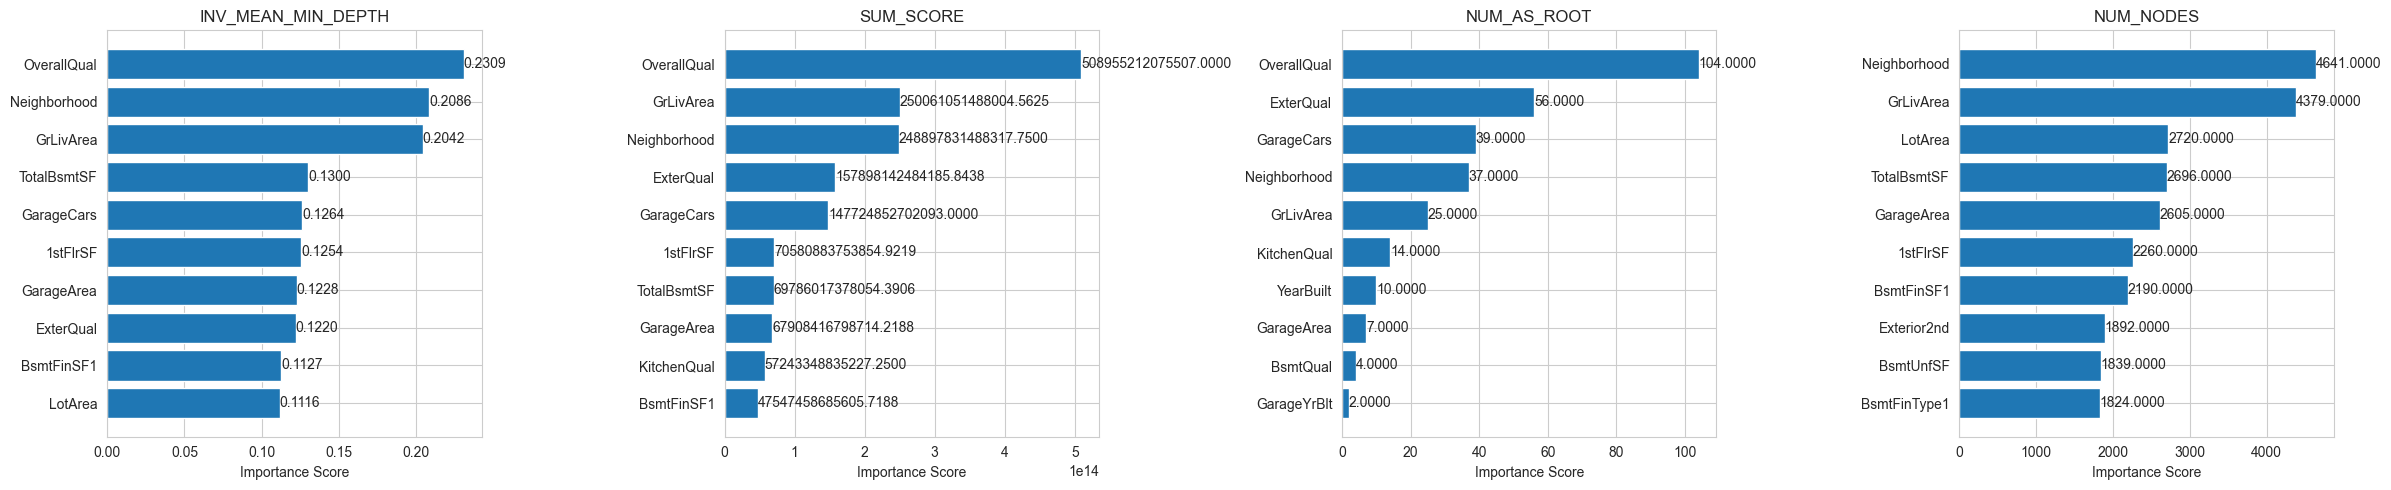

In [17]:
import matplotlib.pyplot as plt

def plot_feature_importance(importances_dict, top_k=10):
    num_metrics = len(importances_dict)
    fig, axs = plt.subplots(1, num_metrics, figsize=(6 * num_metrics, 5))

    # 处理只有一个子图的情况
    if num_metrics == 1:
        axs = [axs]

    for ax, (metric_name, importances) in zip(axs, importances_dict.items()):
        top_features = importances[:top_k]
        features = [f[0].name for f in top_features]
        scores = [f[1] for f in top_features]

        # 反转用于从高到低绘图
        features = features[::-1]
        scores = scores[::-1]

        bars = ax.barh(features, scores)
        ax.set_title(metric_name)
        ax.set_xlabel("Importance Score")

        # 为每个bar添加数值标签
        for bar, score in zip(bars, scores):
            ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{score:.4f}",
                    va='center', ha='left')

    plt.tight_layout()
    plt.show()

# 绘图
plot_feature_importance(importances)